In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URl for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1

# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 5o for logging purposes.
    if (i %  50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | beloha
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | axim
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | nenjiang
Processing Record 20 of Set 1 | nikolskoye
Proces

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,70.30,89,6,5.01,BR,2022-06-21 03:45:09
1,Beloha,-25.1667,45.0500,65.48,61,57,8.95,MG,2022-06-21 03:45:10
2,Katsuura,35.1333,140.3000,75.47,85,100,4.09,JP,2022-06-21 03:45:10
3,Axim,4.8699,-2.2405,75.18,91,74,5.68,GH,2022-06-21 03:45:10
4,Hermanus,-34.4187,19.2345,51.80,82,75,7.63,ZA,2022-06-21 03:45:11
5,Kodiak,57.7900,-152.4072,56.71,67,20,6.91,US,2022-06-21 03:45:11
6,Arraial Do Cabo,-22.9661,-42.0278,69.76,88,40,9.22,BR,2022-06-21 03:45:11
7,Avarua,-21.2078,-159.7750,80.65,83,74,9.22,CK,2022-06-21 03:45:12
8,Butaritari,3.0707,172.7902,82.81,70,27,12.77,KI,2022-06-21 03:45:12
9,Raudeberg,61.9875,5.1352,51.87,91,100,19.17,NO,2022-06-21 03:45:12


In [11]:
# Reordering the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caravelas,BR,2022-06-21 03:45:09,-17.7125,-39.2481,70.30,89,6,5.01
1,Beloha,MG,2022-06-21 03:45:10,-25.1667,45.0500,65.48,61,57,8.95
2,Katsuura,JP,2022-06-21 03:45:10,35.1333,140.3000,75.47,85,100,4.09
3,Axim,GH,2022-06-21 03:45:10,4.8699,-2.2405,75.18,91,74,5.68
4,Hermanus,ZA,2022-06-21 03:45:11,-34.4187,19.2345,51.80,82,75,7.63
5,Kodiak,US,2022-06-21 03:45:11,57.7900,-152.4072,56.71,67,20,6.91
6,Arraial Do Cabo,BR,2022-06-21 03:45:11,-22.9661,-42.0278,69.76,88,40,9.22
7,Avarua,CK,2022-06-21 03:45:12,-21.2078,-159.7750,80.65,83,74,9.22
8,Butaritari,KI,2022-06-21 03:45:12,3.0707,172.7902,82.81,70,27,12.77
9,Raudeberg,NO,2022-06-21 03:45:12,61.9875,5.1352,51.87,91,100,19.17


In [12]:
# Create the output file (CSV)
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1655784051.809324

In [15]:
today = time.strftime("%x")
today

'06/21/22'

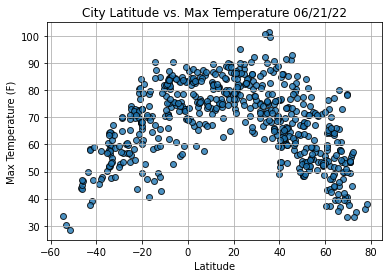

In [16]:
# Import time module
import time

# Add Dependencies
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

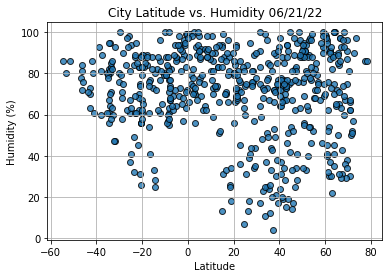

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

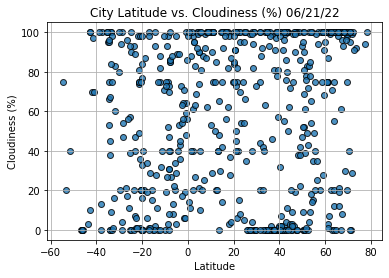

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

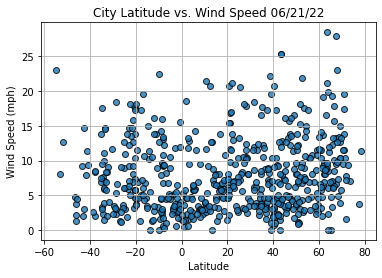

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [47]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=11, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                       Namibe
Country                        AO
Date          2022-06-21 03:44:42
Lat                      -15.1961
Lng                       12.1522
Max Temp                    58.14
Humidity                       73
Cloudiness                      0
Wind Speed                   3.44
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
579     True
580     True
581    False
582     True
583    False
Name: Lat, Length: 584, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Katsuura,JP,2022-06-21 03:45:10,35.1333,140.3000,75.47,85,100,4.09
3,Axim,GH,2022-06-21 03:45:10,4.8699,-2.2405,75.18,91,74,5.68
5,Kodiak,US,2022-06-21 03:45:11,57.7900,-152.4072,56.71,67,20,6.91
8,Butaritari,KI,2022-06-21 03:45:12,3.0707,172.7902,82.81,70,27,12.77
9,Raudeberg,NO,2022-06-21 03:45:12,61.9875,5.1352,51.87,91,100,19.17


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

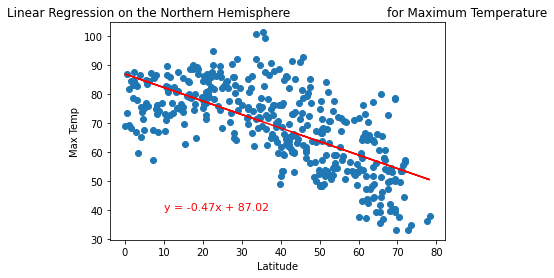

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

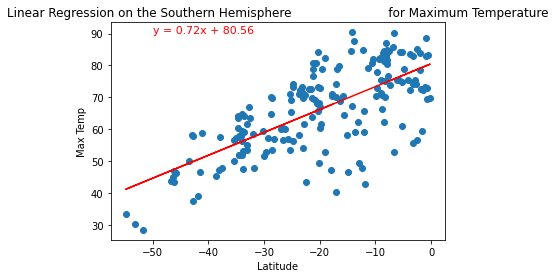

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

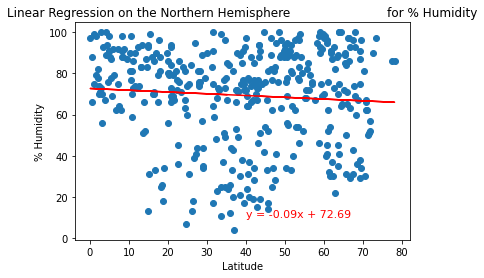

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

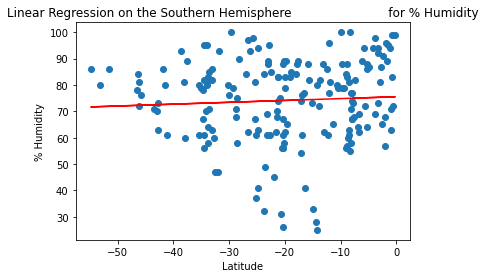

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

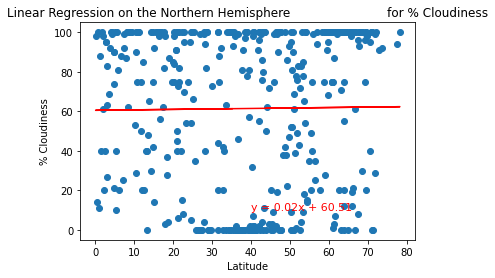

In [51]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

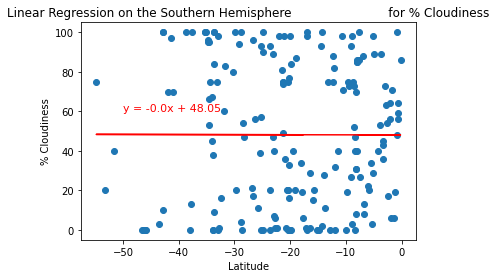

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

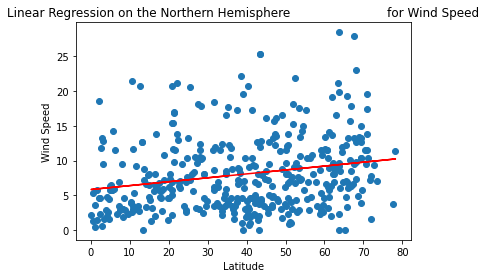

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

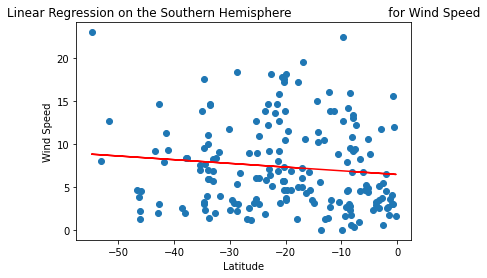

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))